### Algorithm Soft Actor-Critic<br>
FROM PAPER
***
**Input:**  $\theta_1, \theta_2, \phi .$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$\bar{\theta}_1\leftarrow \theta_1 ,\bar{\theta}_2\leftarrow \theta_2$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$D \leftarrow \varnothing$<br>
&nbsp;&nbsp;&nbsp;&nbsp;**for** each iteration **do**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**for** each environment step **do**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$a_t \sim \pi_\phi(a_t|s_t)$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$s_{t+1}\sim p(s_{t+1}|s_t, a_t)$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$D \leftarrow D\cup\{(s_t,a_t,r(s_t,a_t),s_{t+1})\}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**end for**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**for** each gradient step **do**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\theta_i\leftarrow\theta_i - \lambda_Q\hat{\nabla}_{\theta_i}J_Q(\theta_i) $&nbsp;&nbsp;for $i\in \{1,2\}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Update the Q-function parameters<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\phi \leftarrow \phi - \lambda_\pi\hat{\nabla}_\phi J_\pi(\phi)$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Update policy weights<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\psi\leftarrow \lambda_V\hat{\nabla}_\psi J_V(\psi)$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Adjust temperature<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\bar{\theta}_i\leftarrow \tau\theta_i+(1-\tau)\bar{\theta}_i $&nbsp; for$i\in \{1,2\}$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Update target network weights<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**end for**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**end for**<br>
**Output:**&nbsp;$\theta_1,\theta_2,\phi$

### Main Formula:
1. Soft Bellman residual:
$$
J_Q(\theta)=\mathbb{E}_{(s_t,a_t)\sim D}\big[\frac{1}{2}(Q_\theta(s_t,a_t)-{\cal{T}}^\pi Q(s_t,a_t))^2\big]\tag{1}
$$
Soft Q-value function:
$$
{\cal{T}}^\pi Q(s_t,a_t) \triangleq r(s_t,a_t)+\gamma\mathbb{E}_{s_{t+1}\sim p}[V_\bar{\theta}(s_{t+1})]\tag{2}
$$
Soft state value function:
$$
V(s_t) = \mathbb{E}_{a_t\sim \pi}[Q(s_t,a_t)-\alpha\log\pi(a_t|s_t)]\tag{3}
$$
由此推出Soft Bellman residual导数:
$$
\hat{\nabla}_\theta J_Q(\theta)=\nabla_\theta Q_\theta(a_t,s_t)(Q_\theta(s_t,a_t)-(r(s_t,a_t)+\gamma(Q_{\bar{\theta}}(s_{t+1},a_{t+1})-\alpha\log(\pi_\phi(a_{t+1}|s_{t+1}))))\tag{4}
$$
2. Policy Loss:
$$
J_\pi(\phi)=-\mathbb{E}_{s_t\sim D}\big[\mathbb{E}_{a_t\sim \pi_\phi}[Q_\phi(s_t,a_t)-\alpha\log(\pi_\phi(a_t|s_t))]\big]\tag{5}
$$
又
$$
a_t=f_\phi(\epsilon_t;s_t),\tag{6}
$$
所以可写成:
$$
J_\pi(\phi)=-\mathbb{E}_{s_t\sim D,\;\epsilon_t\sim N}[Q_\theta(s_t,f_\phi(\epsilon_t;s_t))-\alpha\log\pi_\phi(f_\phi(\epsilon_t;s_t)|s_t)]\tag{7}
$$
所以其导数形式为:
$$
\hat{\nabla}_\phi J_\pi(\phi)=\nabla_\phi\alpha\log(\pi_\phi(a_t|s_t))+\big(\nabla_{a_t}\alpha\log(\pi_\phi(a_t|s_t))-\nabla_{a_t}Q(s_t,a_t)\big)\nabla_\phi f_\phi(\epsilon_t;s_t),\tag{8}
$$
3. 自适应temperature $\alpha$(论文中说$\alpha$和$Q$、$\pi$是对偶问题，有点不明白):
$$
\alpha^*_t=\arg {\min_{\alpha_t}}\mathbb{E}_{a_t\sim\pi^*_t}[-\alpha_t\log\pi^*_t(a_t|s_t;a_t)-\alpha_t\bar{H}]\tag{9}
$$


### Formula Proofs
1. Proof formula $f_2(f_3)$:<br>
从最开始的动作转移开始，对于在每次$state$采取的$action$所获得的$soft\ reward$都可定义如下:<br><br>
$$
r_{soft}(s_t,a_t)=r(s_t,a_t)+\gamma\alpha\mathbb{E}_{s_{t+1}\sim \rho}H(\pi(\cdot|s_{t+1}))\tag{10}
$$<br>
将其带入到原始的$Q\ function\ : Q(s_t,a_t)=r(s_t,a_t)+\gamma\mathbb{E}_{s_{t+1},a_{t+1}}[Q(s_{t+1},a_{t+1})]$中得:<br><br>
$$
\begin{aligned}
Q_{soft}(s_t,a_t)&=r(s_t,a_t)+\gamma\alpha\mathbb{E}_{s_{t+1}\sim\rho}H(\pi(\cdot|s_{t+1}))+\gamma\mathbb{E}_{s_{t+1},a_{t+1}}[Q_{soft}(s_{t+1},a_{t+1})]\\
&=r(s_t,a_t)+\gamma\mathbb{E}_{s_{t+1}\sim\rho,a_{t+1}\sim\pi}[Q_{soft}(s_{t+1},a_{t+1})]+\gamma\alpha\mathbb{E}_{s_{t+1}\sim\rho}H(\pi(\cdot|s_{t+1}))\\
&=r(s_t,a_t)+\gamma\mathbb{E}_{s_{t+1}\sim\rho,a_{t+1}\sim\pi}[Q_{soft}(s_{t+1},a_{t+1})]+\gamma\mathbb{E}_{s_{t+1}\sim\rho}\mathbb{E}_{a_{t+1}\sim\pi}[-\alpha\log\pi(a_{t+1}|s_{t+1})]\\
&=r(s_t,a_t)+\gamma\mathbb{E}_{s_{t+1}\sim\rho}[\mathbb{E}_{a_{t+1}\sim\pi}[Q_{soft}(s_{t+1},a_{t+1})-\alpha\log(\pi(a_{t+1}|s_{t+1}))]]
\end{aligned}\tag{11}
$$
2. Proff formula $f$

### [相对熵(KL散度)](https://blog.csdn.net/tsyccnh/article/details/79163834)
对于同一个随机变量x单独的概率分布P(x)和Q(x)，用来衡量其分布的差异
$$
D_{KL}(p||q)=\sum_{i=1}^n p(x_i)\log[\frac{p(x_i)}{q(x_i)}]
$$
$D_{KL}$越接近于0，$p,q$分布越接近<br><br>
展开得
$$
\begin{aligned}
D_{KL}(p||q)&=\sum_{i=1}^np(x_i)\log(p(x_i))-\sum^n_{i+1}p(x_i)\log(q(x_i)) \\
&=\underbrace{-H(p(x))}_{熵}+\underbrace{[-\sum^n_{i=1}p(x_i)\log(q(x_i))]}_{交叉熵}
\end{aligned}
$$
在分类问题中，假设label为p，则前部分是不变的，即只需计算后部分，即**交叉熵**

### Landscape
讲了那么多高深的理论，其实就是在actor和critic计算loss的时候分别考虑了entorpy，增加探索。也就是说critic既然是知道actor前进的，那么你也必须将增加探索这四个字铭记在心，不然你怎么知道actor的动作呢<br>
其次，deterministic版本的sac是没有entorpy的，因为是确定性策略所以没有entropy的来源(所以确定性策略的sac其实比TD3效果可能还要差)<br>
要有entorpy必须是normal distribution，所以其实要改成离散的动作空间，也就几行代码的事

### 代码实现的Tips
1. 使用torch.no_grad(), 而不是.detach()更加直观

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import pdb
from torch.distributions import Normal
import torch.nn.functional as F
%matplotlib inline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
class ReplayBuffer:
    def __init__(self, buffer_size, batch_size, state_column, action_column):
        self.state = np.zeros((buffer_size, state_column), dtype=np.float32)
        self.action = np.zeros((buffer_size, action_column), dtype=np.float32)
        self.next_state = np.zeros((buffer_size, state_column), dtype=np.float32)
        self.reward = np.zeros(buffer_size, dtype=np.float32)
        self.done = np.zeros(buffer_size, dtype=np.float32)
        self.batch_size = batch_size
        self.buffer_size = buffer_size
        self.size, self.current_index = 0, 0
    
    def store(self, state, action, next_state, reward, done):
        self.state[self.current_index] =state
        self.action[self.current_index] = action
        self.next_state[self.current_index] = next_state
        self.reward[self.current_index] = reward
        self.done[self.current_index] = done
        self.current_index = (self.current_index + 1) % self.buffer_size
        self.size = min((self.size + 1), self.buffer_size)
    
    def sample(self):
        idx = np.random.choice(self.size, self.batch_size)
        return dict(state = torch.FloatTensor(self.state[idx]).to(device),
                    action = torch.FloatTensor(self.action[idx]).to(device),
                    next_state = torch.FloatTensor(self.next_state[idx]).to(device),
                    reward = torch.FloatTensor(self.reward[idx]).unsqueeze(1).to(device),
                    done = torch.FloatTensor(self.done[idx]).unsqueeze(1).to(device))
    
    def __len__(self):
        return self.size

In [3]:
def weights_init_(m):
    if isinstance(m, nn.Linear):
        # 使用 std = $$\text{std} = \text{gain} \times \sqrt{\frac{2}{\text{fan\_in} + \text{fan\_out}}}$$
        # 来代替高斯分布(0, std ^ 2)的std
        torch.nn.init.xavier_uniform_(m.weight, gain=1)
        if m.bias is not None:
            torch.nn.init.constant_(m.bias, 0)

class Critic(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim=256):
        super(Critic, self).__init__()
        
        self.linear1 = nn.Linear(state_dim+action_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, 1)
        
        self.apply(weights_init_)
        
    def forward(self, state, action):
        data_cat = torch.cat((state, action), dim=1)
        linear = F.relu(self.linear1(data_cat))
        linear = F.relu(self.linear2(linear))
        value = self.linear3(linear)
        return value

class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, action_space=None, hidden_dim=256):
        super(Actor, self).__init__()
        
        self.linear1 = nn.Linear(state_dim, hidden_dim).apply(weights_init_)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim).apply(weights_init_)
        
        self.mean_layer = nn.Linear(hidden_dim, action_dim).apply(weights_init_)
        self.std_layer  = nn.Linear(hidden_dim, action_dim).apply(weights_init_)
        
        # action rescaling
        if action_space is None:
            self.action_scale = torch.tensor(1.)
            self.action_bias = torch.tensor(0.)
        else:
            self.action_scale = torch.FloatTensor((action_space.high - action_space.low) / 2.)
            self.action_bias = torch.FloatTensor((action_space.high + action_space.low) / 2.)
        
    def forward(self, state):
        common = F.relu(self.linear1(state))
        common = F.relu(self.linear2(common))
        mean = self.mean_layer(common)
        log_std = self.std_layer(common)
        log_std = torch.clamp(log_std , min=LOG_SIG_MIN, max=LOG_SIG_MAX)
        return mean, log_std.exp()
    
    def sample(self, state, epsilon=1e-5):
        mean, std = self.forward(state)
        mean = torch.tanh(mean) * self.action_scale + self.action_bias
        normal = Normal(mean, std)
        
        action_bef = normal.rsample() # reparameterization (mean + std * N(0,1))
        
        action = torch.tanh(action_bef) * self.action_scale + self.action_bias
        
        # 获得真实的action的log_prob, 因为action进行了torch.tanh操作
        log_prob = normal.log_prob(action_bef)\
                - torch.log(self.action_scale * (1 - torch.tanh(action_bef).pow(2)) + epsilon)
        log_prob = log_prob.sum(1, keepdim=True)
        return action, log_prob, mean
    
    def to(self, device):
        self.action_scale = self.action_scale.to(device)
        self.action_bias = self.action_bias.to(device)
        return super(Actor, self).to(device)

In [4]:
def smooth_plot(factor, item, plot_decay):
    item_x = np.arange(len(item))
    item_smooth = [np.mean(item[i:i+factor]) if i > factor else np.mean(item[0:i+1])
                  for i in range(len(item))]
    for i in range(len(item)// plot_decay):
        item_x = item_x[::2]
        item_smooth = item_smooth[::2]
    return item_x, item_smooth
    
def plot(episode, rewards, critic_losses, actor_losses, episode_steps):
    clear_output(True)
    rewards_x, rewards_smooth = smooth_plot(10, rewards, 600)
    critic_losses_x, critic_losses_smooth = smooth_plot(10, critic_losses, 30000)
    actor_losses_x, actor_losses_smooth = smooth_plot(10, actor_losses, 30000)
    episode_steps_x, episode_steps_smooth = smooth_plot(10, episode_steps, 600)
    
    plt.figure(figsize=(18, 16))
    plt.subplot(411)
    plt.title('episode %s. Reward: %s'%(episode, rewards_smooth[-1]))
    plt.plot(rewards, label="Rewards", color='lightsteelblue', linewidth='1')
    plt.plot(rewards_x, rewards_smooth, label='Smothed_Rewards', color='darkorange', linewidth='3')
    plt.legend(loc='best')
    
    plt.subplot(412)
    plt.title('Critic_Losses') #%s. Losses: %s'%(episode, critic_losses_smooth[-1]))
    plt.plot(critic_losses,label="Critic_Losses",color='lightsteelblue',linewidth='1')
    plt.plot(critic_losses_x, critic_losses_smooth, 
             label="Smoothed_Critic_Losses",color='darkorange',linewidth='3')
    plt.legend(loc='best')
    
    plt.subplot(413)
    plt.title('Actor_Losses') #%s. Losses: %s'%(episode, actor_losses_smooth[-1]))
    plt.plot(actor_losses,label="Actor_Losses",color='lightsteelblue',linewidth='1')
    plt.plot(actor_losses_x, actor_losses_smooth, 
             label="Smoothed_Actor_Losses",color='darkorange',linewidth='3')
    plt.legend(loc='best')
    
    plt.subplot(414)
    plt.title('Episode_Steps %s. Steps: %s'%(episode, episode_steps_smooth[-1]))
    plt.plot(episode_steps,label="Episode_Steps",color='lightsteelblue',linewidth='1')
    plt.plot(episode_steps_x, episode_steps_smooth, 
             label="Episode_Steps_Losses",color='darkorange',linewidth='3')
    plt.legend(loc='best')
    
    plt.show()

In [5]:
def take_action(state, updates):
    if start_steps > updates:
        action = env.action_space.sample()
    else:
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        with torch.no_grad():
            action, _, _ = actor.sample(state)
        action = action.detach().cpu().numpy().flatten()
    return action

In [6]:
## hyperparameters

LOG_SIG_MAX = 2
LOG_SIG_MIN = -20
env_name = "BipedalWalker-v2"
# env_name = "Pendulum-v0"
buffer_size = int(1e6)
batch_size = 256
episodes = 5000
steps = 2000
start_steps = 2000
learning_rate = 1e-4
alpha = 0.1
gamma = 0.99
soft_tau = 5e-3
actor_update = 2
target_update_interval = 1
updates_per_episode = 300
automatic_entropy_tuning = True

## hyperparameters

env = gym.make(env_name)
env.seed(0)
action_space = env.action_space

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]

critic_1 = Critic(state_dim, action_dim).to(device)
critic_2 = Critic(state_dim, action_dim).to(device)
target_critic_1 = Critic(state_dim, action_dim).to(device)
target_critic_2 = Critic(state_dim, action_dim).to(device)
actor = Actor(state_dim, action_dim, action_space).to(device)
# target_actor = Actor(state_dim, action_dim, action_space).to(device)

target_critic_1.load_state_dict(critic_1.state_dict())
target_critic_2.load_state_dict(critic_2.state_dict())
# target_actor.load_state_dict(actor.state_dict())

critic_optimizer_1 = optim.Adam(critic_1.parameters(), lr=learning_rate)
critic_optimizer_2 = optim.Adam(critic_2.parameters(), lr=learning_rate)
actor_optimizer = optim.Adam(actor.parameters(), lr=learning_rate)

buffer = ReplayBuffer(buffer_size, batch_size, state_dim, action_dim)

# torch.prod()
# Returns the product of all elements in the :attr:`input` tensor
# 返回输入张量中所有元素的乘积(可指定维度)
if automatic_entropy_tuning:
    target_entropy = -torch.prod(torch.Tensor(action_space.shape).to(device)).item() # -4.0
    log_alpha = torch.zeros(1, requires_grad=True, device=device) # tensor([0.], device='cuda:0', requires_grad=True)
    alpha_optim = optim.Adam([log_alpha], lr=learning_rate)

In [7]:
def sac_train(updates, steps_, alpha):
    # for i in range(steps_):
    samples = buffer.sample()
    state, action, next_state = samples["state"], samples["action"], samples["next_state"]
    reward, done = samples["reward"], samples["done"]

    # update critic
    with torch.no_grad():
        # next_action, next_log_pi, _ = target_actor.sample(next_state)
        next_action, next_log_pi, _ = actor.sample(next_state)
        target_Q_1 = target_critic_1(next_state, next_action)
        target_Q_2 = target_critic_2(next_state, next_action)
        Q_target_next = torch.min(target_Q_1, target_Q_2) - alpha * next_log_pi
        next_q_value = reward + (1.0 - done) * gamma * Q_target_next

    Q_1, Q_2 = critic_1(state, action), critic_2(state, action)
    critic_loss_1 = F.mse_loss(next_q_value, Q_1)
    critic_loss_2 = F.mse_loss(next_q_value, Q_2)

    critic_optimizer_1.zero_grad()
    critic_loss_1.backward()
    critic_optimizer_1.step()

    critic_optimizer_2.zero_grad()
    critic_loss_2.backward()
    critic_optimizer_2.step()

    # if i % actor_update == 0:
        # update actor

    next_action_, log_pi_, _ = actor.sample(state)
    min_Q_value = torch.min(critic_1(state, next_action_), critic_2(state, next_action_))
    actor_loss = (alpha * log_pi_ - min_Q_value).mean()

    actor_optimizer.zero_grad()
    actor_loss.backward()
    actor_optimizer.step()

    # update entropy_tuning

    if automatic_entropy_tuning:
        alpha_loss = - log_alpha * (log_pi_.detach() + target_entropy).mean()

        alpha_optim.zero_grad()
        alpha_loss.backward()
        alpha_optim.step()

        alpha = log_alpha.exp()

    # update parameter
    if updates % target_update_interval == 0:
#         for target_param, param in zip(target_actor.parameters(), actor.parameters()):
#             target_param.data.copy_(target_param.data*(1.0-soft_tau) + param.data * soft_tau)
        for target_param, param in zip(target_critic_1.parameters(), critic_1.parameters()):
            target_param.data.copy_(target_param.data*(1.0-soft_tau) + param.data * soft_tau)
        for target_param, param in zip(target_critic_2.parameters(), critic_2.parameters()):
            target_param.data.copy_(target_param.data*(1.0-soft_tau) + param.data * soft_tau)
                    
    return (critic_loss_1 + critic_loss_2).item(), actor_loss.item()

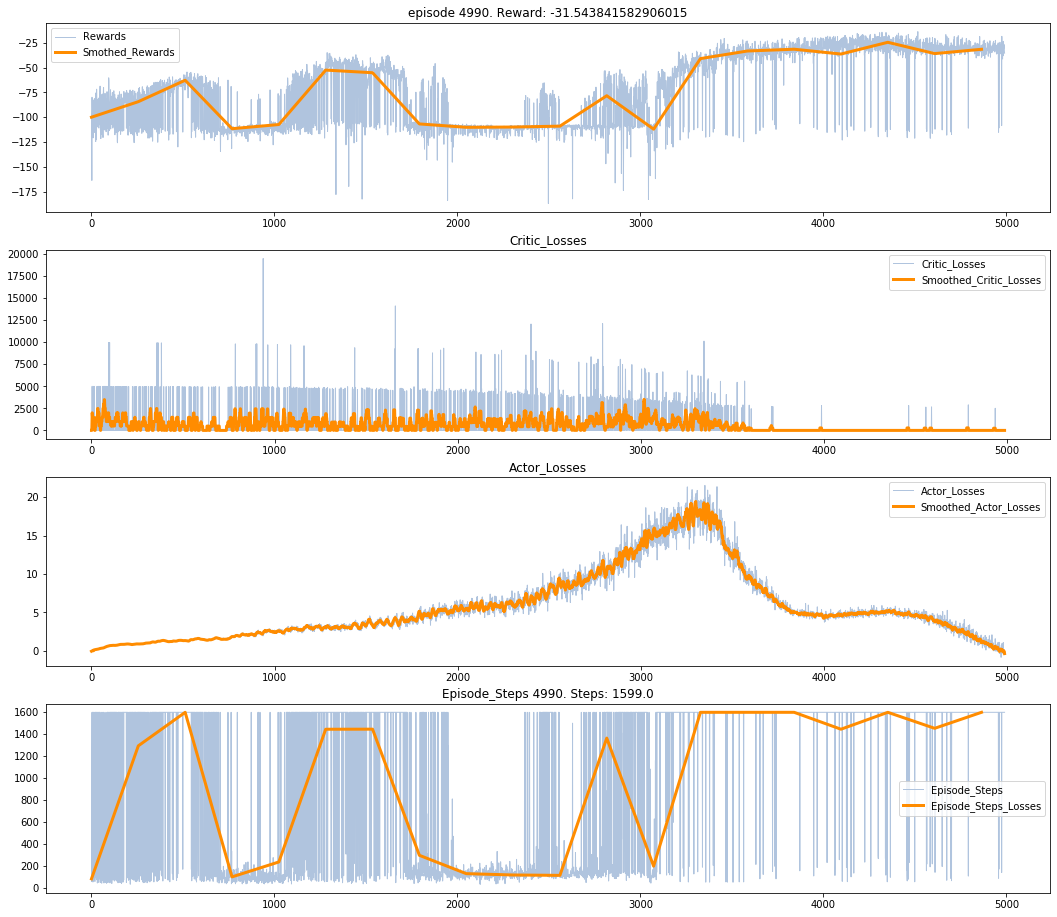

In [8]:
critic_losses, actor_losses, all_rewards, episode_steps, updates = [], [], [], [], 0

for episode in range(episodes):
    state = env.reset()
    episode_reward = 0
    for i in range(steps):
        action = take_action(state, updates)
        next_state, reward, done, _ = env.step(action)
        
        # done = 0 if i+1 == env._max_episode_steps else float(done)
        buffer.store(state, action, next_state.flatten(), reward * 8.0, done)
        
        state = next_state
        episode_reward += reward
        updates += 1
        
        if done or i==(steps-1):
            if len(buffer) > batch_size:
                critic_loss, actor_loss = sac_train(updates, i+1, alpha)
                critic_losses.append(critic_loss)
                actor_losses.append(actor_loss)
            episode_steps.append(i)
            break
        
    all_rewards.append(episode_reward)
    
    if episode % 10 == 0:
        plot(episode, all_rewards, critic_losses, actor_losses, episode_steps)